In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [158]:
#Semi-circulo unitario frecuentista

xxI = np.array([])
yyI = np.array([])
xxO = np.array([])
yyO = np.array([])
N = 1000

#Generar 1000 pares aleatorios
for i in range(N):
    #Numero aleatorio entre 0 y 1
    y = random.random()

    #Numero aleatorio entre -1 y 1
    x = 2.0*((random.random())-0.5)

    #Distancia del par de puntos al origen (0,0)
    r = np.sqrt(x**2 + y**2)
    
    #Si es mayor al circulo unitario guarda en un array
    if(r>1):
        xxO = np.append(xxO,x)
        yyO = np.append(yyO,y)
    #Si es menor se guarda en otra
    else:
        xxI = np.append(xxI,x)
        yyI = np.append(yyI,y)

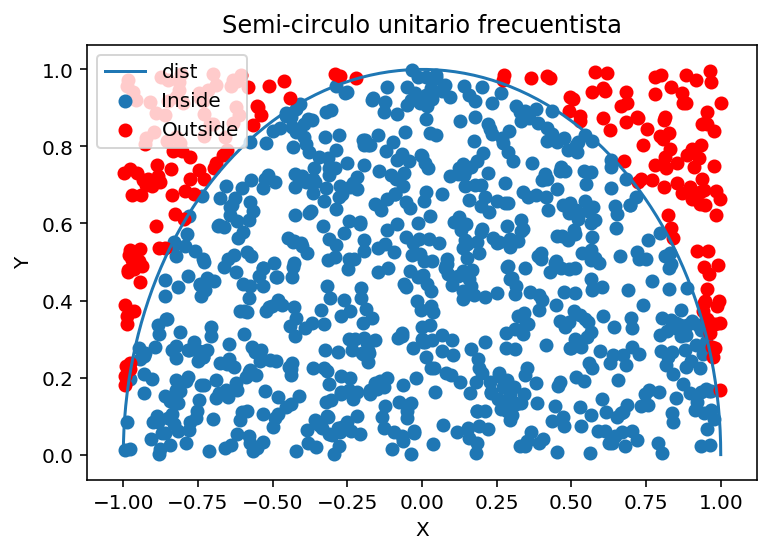

In [160]:
#Graficar

#Semi - circulo unitario
p = np.linspace(0,1,100)
pi = np.pi*p
R = 1.0

xc = R*np.cos(pi)
yc = R*np.sin(pi)

plt.title("Semi-circulo unitario frecuentista")
plt.xlabel("X")
plt.ylabel("Y")

plt.plot(xc,yc, label= "dist")

#Puntos aleatorios
#Inside
plt.scatter(xxI,yyI, label = "Inside" )
#Outside
plt.scatter(xxO,yyO, c = "r", label = "Outside")

plt.legend(loc = 2)

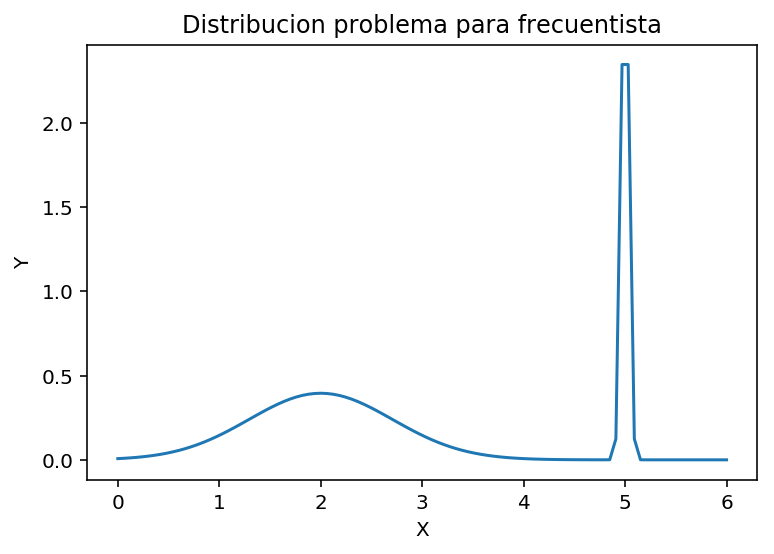

In [171]:
#Dificultades del metodo frecuentista

#Deficion de la funcion fea
def nasty(x):
    a = 0.3/float(np.sqrt(0.0025*np.pi))
    b = -1.0*(((x-5)/0.05)**2)
    c = 0.7/float(np.sqrt(np.pi))
    d = -1.0*((x-2)**2)
    return (a*np.exp(b)) + (c*np.exp(d))

#Grafica de la funcion
xn = np.linspace(0,6,100)
yn = nasty(xn)

plt.title("Distribucion problema para frecuentista")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(xn,yn)

In [176]:
xxII = np.array([])
yyII = np.array([])
xxOO = np.array([])
yyOO = np.array([])
NN = 1000
#Generar 1000 pares aleatorios
for i in range(NN):
    #Numero aleatorio entre 0 y 3.5
    y1 = 3.5*random.random()

    #Numero aleatorio entre 0 y 6
    x1 = 6.0*random.random()
    
    #Si y es mayor a funcion evaluada en x guardar en un array
    if(y1 > nasty(x1)):
        xxOO = np.append(xxOO,x1)
        yyOO = np.append(yyOO,y1)
    #Si es menor se guarda en otro
    else:
        xxII = np.append(xxII,x1)
        yyII = np.append(yyII,y1)

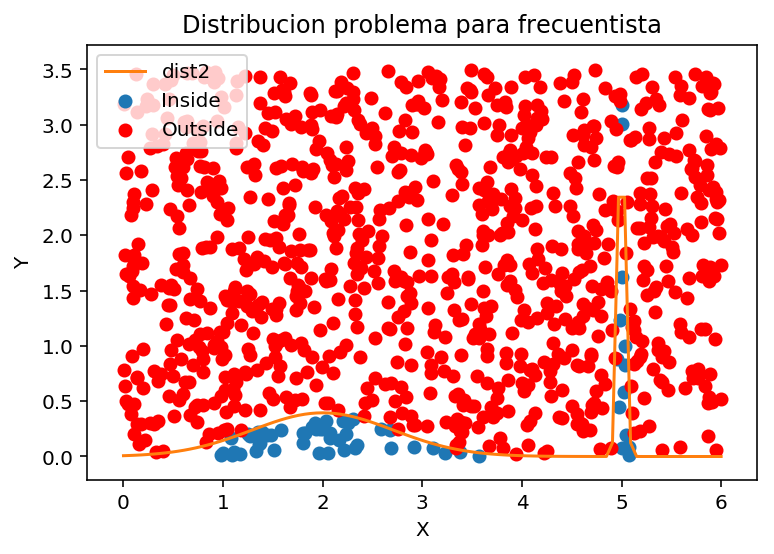

In [177]:
#Graficar

plt.title("Distribucion problema para frecuentista")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(xn,yn, color ='tab:orange', label = "dist2")

#Puntos aleatorios
#Inside
plt.scatter(xxII,yyII, label = "Inside" )
#Outside
plt.scatter(xxOO,yyOO, c = "r", label = "Outside")

plt.legend(loc = 2)

In [189]:
#Histograma frecuentista

xxI3 = np.array([])
yyI3 = np.array([])
xxO3 = np.array([])
yyO3 = np.array([])
N3 = 100000
no = 0

#Generar 100000 pares aleatorios
for i in range(N3):
    #Numero aleatorio entre 0 y 3.5
    y3 = 3.5*random.random()

    #Numero aleatorio entre 0 y 6
    x3 = 6.0*random.random()
    
    #Si y es mayor a funcion evaluada en x guardar en un array
    if(y3 > nasty(x3)):
        xxO3 = np.append(xxO3,x3)
        yyO3 = np.append(yyO3,y3)
        no = no+1
    #Si es menor se guarda en otro
    else:
        xxI3 = np.append(xxI3,x3)
        yyI3 = np.append(yyI3,y3)


/ext/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


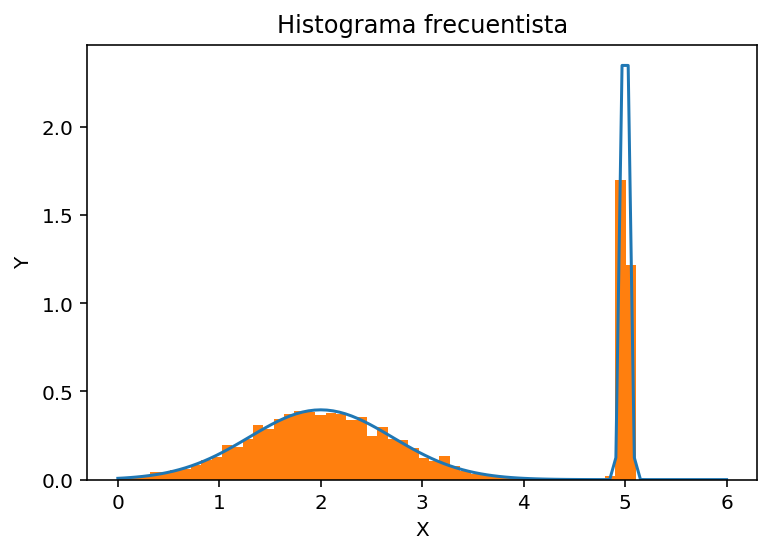

In [213]:
#Graficar Histograma

plt.title("Histograma frecuentista")
plt.xlabel("X")
plt.ylabel("Y")

norm = sum(yn*(xn[1]-xn[0]))
plt.plot(xn,yn/norm)
#plt.plot(xn,yn)
count, bins, ignored = plt.hist(xxI3, 50, normed=True)

In [194]:
#Mensaje con la fraccion de puntos que no se tomaron en cuenta
MM = "Fraccion de puntos que no se tomaron en cuenta: " + str(no) + "/100000 = " + str(no/100000) + " = " + str((no/100000)*100) + "%"
print(MM)

Fraccion de puntos que no se tomaron en cuenta: 95291/100000 = 0.95291 = 95.291%


In [225]:
#Metropolis Hastings

x_walk = np.array([])

#Numero aleatorio entre 0 y 6 - Paso inicial
xo = 6.0*random.random()
x_walk = np.append(x_walk,xo)

In [226]:
NMH = 100000

for i in range(NMH):
    
    #X_walk[i] es el centro de la gaussiana
    #0.55 es ancho de gaussiana de la distribucion normal
    x_prime = np.random.normal(x_walk[i], 0.55)
    
    #Ratio entre funcion evaluada dando el paso aleatorio desde x_walk[i]
    # y function evaluada en x_walk[i]
    alpha = nasty(x_prime)/nasty(x_walk[i])
    
    #Si ratio es mayor o igual a 1 se guarda posicion con el paso
    if(alpha>=1.0):
        x_walk  = np.append(x_walk,x_prime)
        
    #Si es menor se genera numero aleatorio entre 0 y 1
    else:
        beta = random.random()
        
        #Si se cumple condicion se guarda posicion con el paso
        if(beta<=alpha):
            x_walk = np.append(x_walk,x_prime)
        #De lo contrario se guarda otra vez el paso donde se estaba
        else:
            x_walk = np.append(x_walk,x_walk[i])

/ext/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


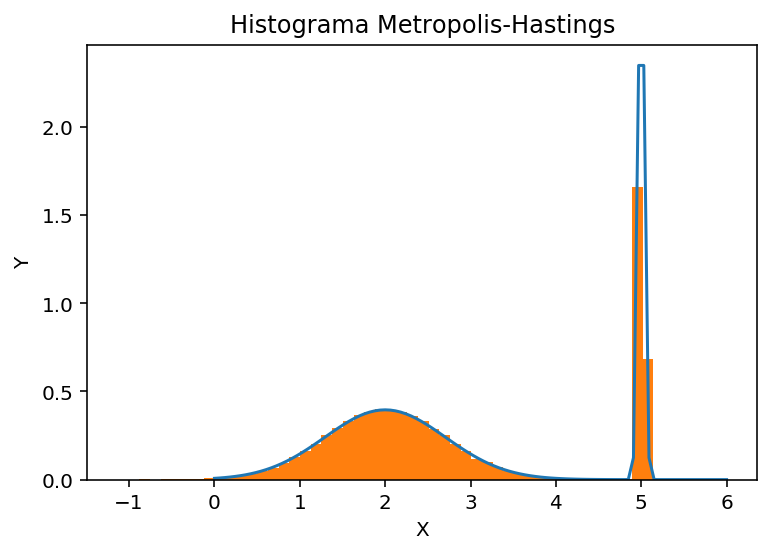

In [227]:
#Graficar Histograma

plt.title("Histograma Metropolis-Hastings")
plt.xlabel("X")
plt.ylabel("Y")

norm = sum(yn*(xn[1]-xn[0]))
plt.plot(xn,yn/norm)
#plt.plot(xn,yn)

#Se eliminan los primeros 500 pasos que generan ruido
x_walkOK = x_walk[500:]
count, bins, ignored = plt.hist(x_walkOK, 50, normed=True)